<a href="https://colab.research.google.com/github/hlcostales/CSA102-2025/blob/main/CSA102_2025_L02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Aquisition

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Step 2: Exploratory Data Analysis (EDA)

In [2]:
# Print the shapes of the loaded data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


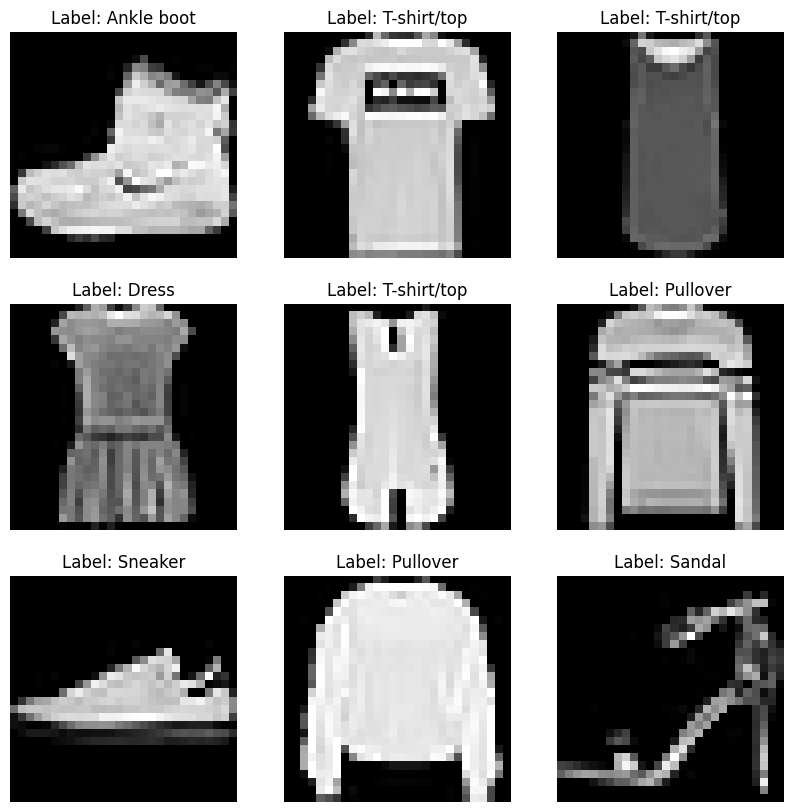

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# create list of class_names that maps to 0 - 9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.show()

# Step 3. Data Preprocessing

In [4]:
# Scale the images to the [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("x_train shape after scaling:", x_train.shape)
print("x_test shape after scaling:", x_test.shape)

x_train shape after scaling: (60000, 28, 28)
x_test shape after scaling: (10000, 28, 28)


# Step 4. Modelling

In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 units for the 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7630 - loss: 0.6735 - val_accuracy: 0.8504 - val_loss: 0.4083
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8526 - loss: 0.3937 - val_accuracy: 0.8615 - val_loss: 0.3930
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8722 - loss: 0.3426 - val_accuracy: 0.8772 - val_loss: 0.3410
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8834 - loss: 0.3141 - val_accuracy: 0.8735 - val_loss: 0.3553
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8884 - loss: 0.2985 - val_accuracy: 0.8747 - val_loss: 0.3480
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8937 - loss: 0.2840 - val_accuracy: 0.8827 - val_loss: 0.3248
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8998 - loss: 0.2704 - val_accuracy: 0.8844 - val_loss: 0.3317
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9021 - loss: 0.2547 - 

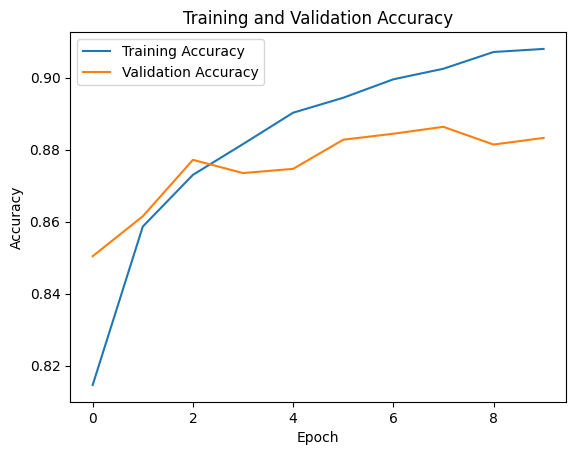

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

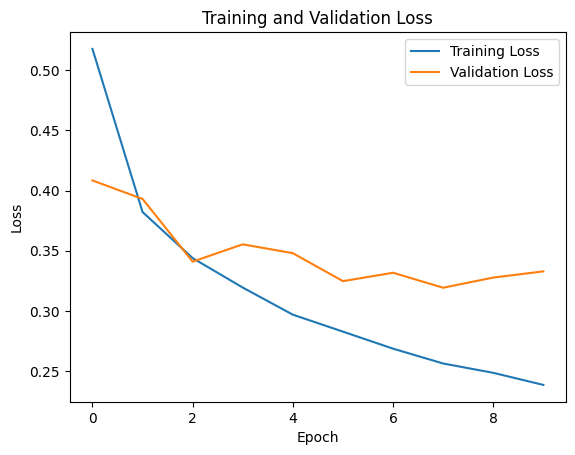

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5. Perform Predictions

In [9]:
# Generate predictions
predictions = model.predict(x_test)

# Print the shape of the predictions
print("Predictions shape:", predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions shape: (10000, 10)


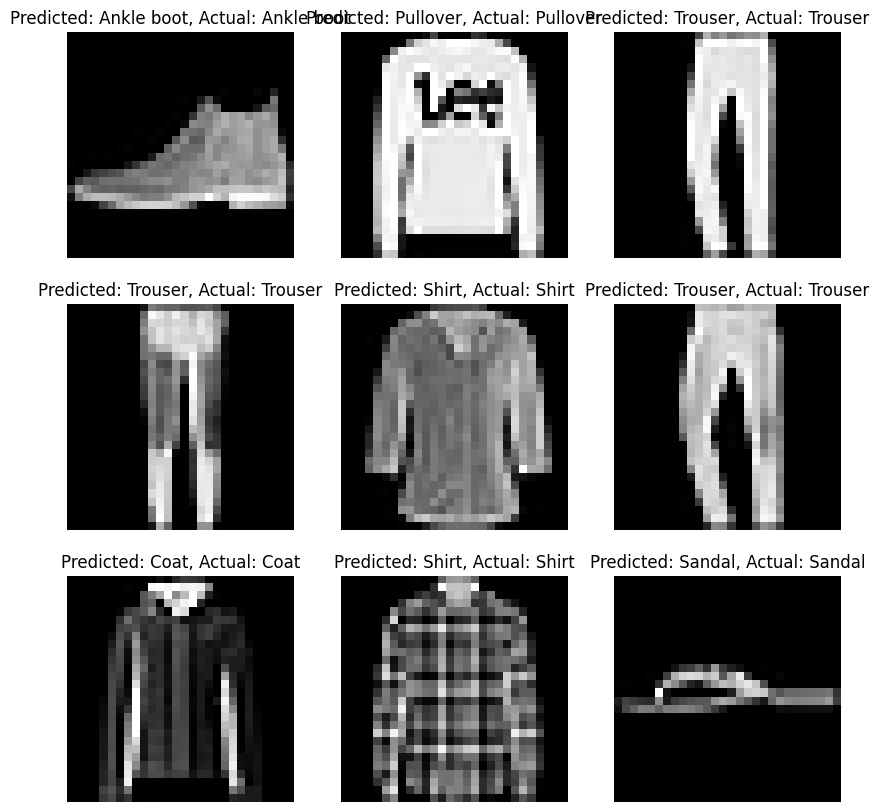

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Display some test images and their predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i]]
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
plt.show()

# Step 6. Model Evaluation

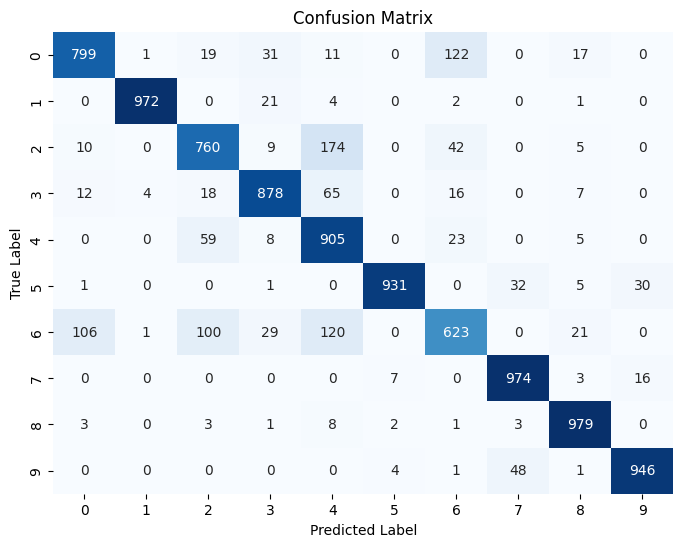

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted classes from the predictions
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.76      0.78      1000
           3       0.90      0.88      0.89      1000
           4       0.70      0.91      0.79      1000
           5       0.99      0.93      0.96      1000
           6       0.75      0.62      0.68      1000
           7       0.92      0.97      0.95      1000
           8       0.94      0.98      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert true labels to one-hot encoding for ROC AUC calculation
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Calculate ROC AUC for each class
roc_auc_scores = roc_auc_score(y_test_bin, predictions, average=None)

# Print the ROC AUC scores for each class
for i, score in enumerate(roc_auc_scores):
    print(f"ROC AUC for class {i}: {score:.4f}")

# Calculate macro-average ROC AUC
macro_roc_auc = roc_auc_score(y_test_bin, predictions, average='macro')
print(f"\nMacro-average ROC AUC: {macro_roc_auc:.4f}")

ROC AUC for class 0: 0.9877
ROC AUC for class 1: 0.9992
ROC AUC for class 2: 0.9811
ROC AUC for class 3: 0.9939
ROC AUC for class 4: 0.9843
ROC AUC for class 5: 0.9986
ROC AUC for class 6: 0.9610
ROC AUC for class 7: 0.9985
ROC AUC for class 8: 0.9986
ROC AUC for class 9: 0.9975

Macro-average ROC AUC: 0.9900


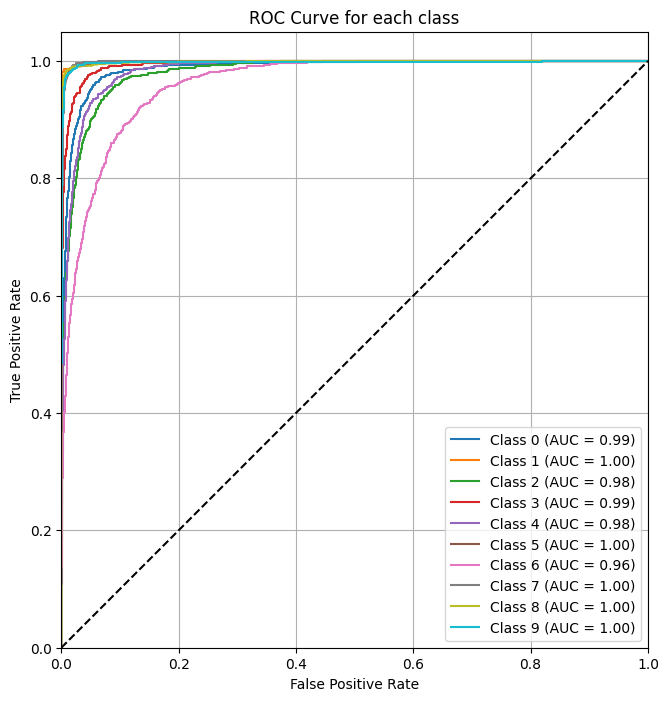

In [14]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Convert true labels to one-hot encoding for ROC AUC calculation
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Calculate ROC curve and ROC AUC for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'Class {i}')
    display.plot(ax=plt.gca())

plt.title('ROC Curve for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--') # Add diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 7. Deployment

In [15]:
# Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('fashion_mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as fashion_mnist_model.tflite")

Saved artifact at '/tmp/tmpj5qow59i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137890034953552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137890034954512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137890034953936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137890034954320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137890034954704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137890034952592: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as fashion_mnist_model.tflite


In [15]:
%pip install gradio

# Step 8. Monitoring